In [1]:
import cv2

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

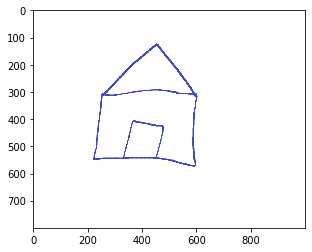

In [2]:
image = cv2.imread('./Section4Images/House.jpg')

original = image.copy()

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)

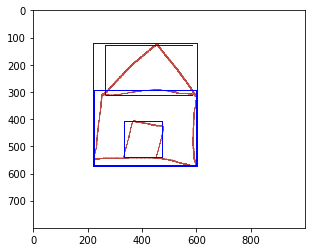

In [3]:
# Grayscale and binarize

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours 

contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)


# Iterate through each contour and compute the bounding rectangle

for c in contours :
    
    x,y,w,h = cv2.boundingRect(c)
    
    cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2)  
    
    plt.imshow(original)

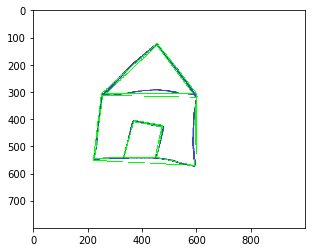

In [4]:
# Iterate through each contour and compute the approx contour

for c in contours :
    
    # Calculate accuracy as a percent of the contour perimeter
    
    accuracy = 0.03 * cv2.arcLength(c, True)
    
    approx = cv2.approxPolyDP(c, accuracy, True)
    
    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
    
    plt.imshow(image)

## Convex Hull

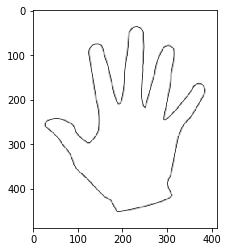

In [5]:
image = cv2.imread('./Section4Images/Hand.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image)

In [6]:
# Threshold the image

ret, thresh = cv2.threshold(gray, 176, 255, 0)


# Find contours 

contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

    
# Sort Contors by area and then remove the largest frame contour

n = len(contours) - 1

contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull

for c in contours :
    
    hull = cv2.convexHull(c)
    
    cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)
    
    cv2.imshow('Convex Hull', image)
    
cv2.waitKey(0)    

cv2.destroyAllWindows()